In [ ]:
# Importing Packages for data loading, visualization and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading Training and Testing Data
data=pd.read_csv('./data/LinearRegression/data.csv')

In [ ]:
data

In [ ]:
data.isnull().sum()

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [ ]:
y

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=0)

In [ ]:
# Building a simple linear regression model to predict the y values
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
# Fitting the model 
regressor.fit(X_train, y_train)

In [ ]:
# Predictiong the test data
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

## Mean absolute error

# Import package 

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test, y_pred)

# Mean square error

# Import package

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_MSE=mean_squared_error(y_train, regressor.predict(X_train))
test_MSE=mean_squared_error(y_test, y_pred)

In [ ]:
test_MSE

# R^2 score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs weights (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## Multiple Linear Regression

In [ ]:
# Importing Packages for data loading, visualization and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading Training and Testing Data
data=pd.read_csv('./data/MultipleLinearRegression/insurance.csv')

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

# Separating the data into X and y

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 6].values

In [ ]:
y

# Dealing with catagorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
X[:, 1] = labelencoder.fit_transform(X[:, 1])
X[:, 4] = labelencoder.fit_transform(X[:, 4])
X[:, 5] = labelencoder.fit_transform(X[:, 5])

In [ ]:
onehotencoder = OneHotEncoder(categorical_features = [5])

In [ ]:
X = onehotencoder.fit_transform(X).toarray()

In [ ]:
X

# Dummy Variable Trap

In [ ]:
X

In [ ]:
X = X[:, 1:]

In [ ]:
X

# Building the optimal model using Backward Elimination using statsmodels Package

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt = X[:, [0, 1, 2, 3, 4, 6, 7, 8]]
# we removed 5th column. lets execute this
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt = X[:, [0, 2, 3, 4, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt = X[:, [0, 2, 4, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt = X[:, [0, 4, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
#Splitting X-opt into training and Split test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
#Model Evaluation

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

## Polynomial regression :

In [1]:
# Importing Packages for data loading, visualization and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading Training and Testing Data
data=pd.read_csv('./data/PolynomialRegression/HousingData.csv')

In [3]:
data

,Purchase time passed(1990),Pricing
0,1.1,39343
1,1.2,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.8,56642
6,3.0,60150
7,3.2,54445
8,3.3,64445
9,3.8,57189


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Purchase time passed(1990)    30 non-null float64
Pricing                       30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [5]:
data.isnull().sum()

Purchase time passed(1990)    0
Pricing                       0
dtype: int64

In [6]:
# Quality the parameter to be predicted is represented as y.

In [7]:
y = data[['Pricing']]

In [8]:
# All the input parameters used to predict the value are represented as X.
X = data[['Purchase time passed(1990)']]

In [9]:
# Data-set is divided into test data and train data based on test_size variable.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Fit the training data into polynomial model of degree 4

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
model = PolynomialFeatures(degree= 3)
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

In [15]:
# Loading Linear Regression model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lg = LinearRegression()
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Predictiong the test data
y_pred = lg.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9510444734524638

# Regression Splines

In [20]:
# import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

In [21]:
# read data_set
data = pd.read_csv("./data/regression_spline/Wage.csv")

In [22]:
data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [23]:
data_x = data['age']
data_y = data['wage']

In [24]:
# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

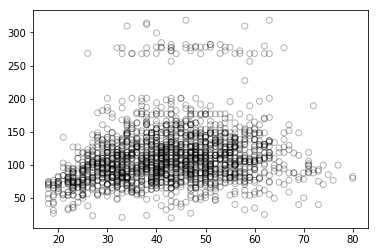

In [25]:
# Visualize the relationship b/w age and wage
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# Fitting linear regression model
x = train_x.values.reshape(-1,1)
model = LinearRegression()

In [28]:
model.fit(x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# Prediction on validation dataset
valid_x = valid_x.values.reshape(-1,1)
pred = model.predict(valid_x)

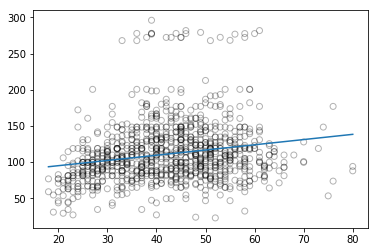

In [32]:
# Visualisation
# We will use 70 plots between minimum and maximum values of valid_x for plotting
xp = np.linspace(valid_x.min(),valid_x.max(),70)
xp = xp.reshape(-1,1)
pred_plot = model.predict(xp)

plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

# Improvement over Linear Regression: Polynomial Regression

In [33]:
# Generating weights for polynomial function with degree =2
weights = np.polyfit(train_x, train_y, 2)

In [34]:
# Generating model with the given weights
model = np.poly1d(weights)

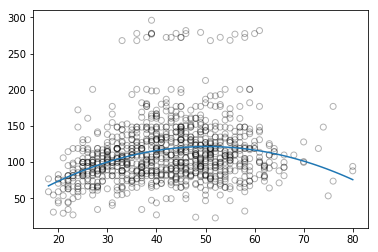

In [35]:
# Prediction on validation set
pred = model(valid_x)
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

In [36]:
# Similarly, we can plot polynomial curves for different degree values.  like with degree 4

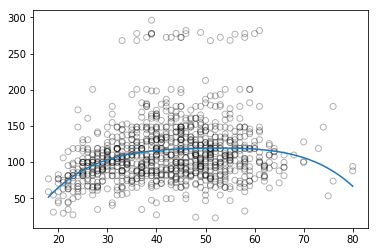

In [37]:
# Generating weights for polynomial function with degree =4
weights = np.polyfit(train_x, train_y, 4)

# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(valid_x)
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

with degree 16

C:\Users\IIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


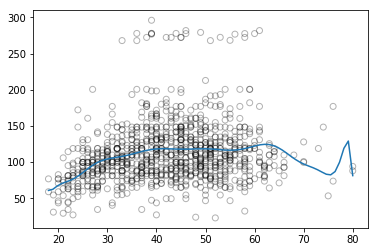

In [38]:
# Generating weights for polynomial function with degree =16
weights = np.polyfit(train_x, train_y, 16)

# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(valid_x)
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

In [39]:
# oK, NOW  its time to implement Regression Splines

In [40]:
# Dividing the data into 4 bins
df_cut, bins = pd.cut(train_x, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]    504
(33.5, 49.0]      941
(49.0, 64.5]      511
(64.5, 80.0]       54
Name: age, dtype: int64

In [41]:
df_steps = pd.concat([train_x, df_cut, train_y], keys=['age','age_cuts','wage'], axis=1)

# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
1382,0,1,0,0
23,0,1,0,0
2140,0,0,1,0
1117,1,0,0,0
933,0,1,0,0


In [42]:
df_steps_dummies.columns = ['17.938-33.5','33.5-49','49-64.5','64.5-80']

In [43]:
# Fitting Generalised linear models
fit3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()

In [44]:
# Binning validation set into same 4 bins
bin_mapping = np.digitize(valid_x, bins)

In [45]:
bin_mapping = pd.DataFrame(bin_mapping)
bin_mapping.columns = ['bins']
bin_mapping.bins = bin_mapping.bins.astype('O')

In [46]:
X_valid = pd.get_dummies(bin_mapping)
X_valid.head()

,bins_1,bins_2,bins_3,bins_4,bins_5
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [47]:
# Removing any outliers
X_valid = pd.get_dummies(bin_mapping).drop(['bins_5'], axis=1)

# Prediction
pred2 = fit3.predict(X_valid)

In [48]:
# We will plot the graph for 70 observations only

In [49]:
xp = np.linspace(valid_x.min(),valid_x.max()-1,70) 
bin_mapping = np.digitize(xp, bins) 
X_valid_2 = pd.get_dummies(bin_mapping) 
pred2 = fit3.predict(X_valid_2)

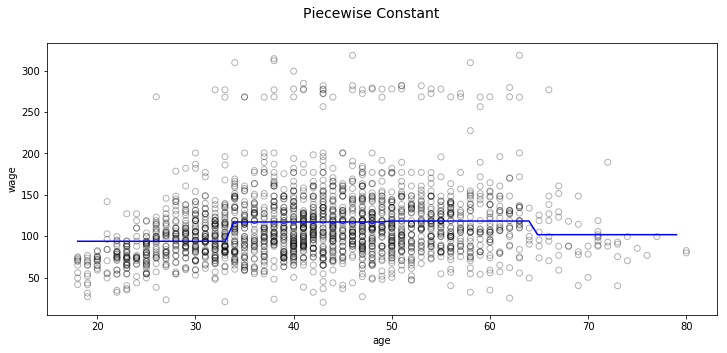

In [50]:
# Visualisation
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()

## Support Vector regression

In [51]:
# import the libraries important for data loading and preprocessing
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# Loading the data
data = pd.read_csv('./data/svr/SVR_Data.csv')

In [53]:
data

,X,y
0,0.011562,-0.435556
1,0.126902,0.991959
2,0.407993,0.917919
3,0.478538,0.887669
4,0.524606,0.865521
5,0.740627,0.481991
6,0.904990,0.617694
7,0.959010,0.574331
8,1.040530,0.505763
9,1.336384,0.232271


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
X    40 non-null float64
y    40 non-null float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [55]:
# data has 40 entries, it contains 2 columns

In [56]:
X = data.iloc[:,0:1].values
y = data.iloc[:,1:].values

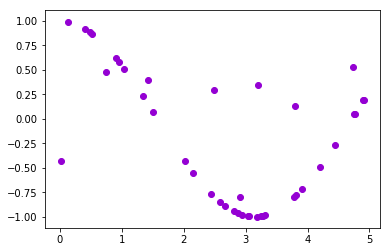

In [57]:
plt.scatter(X, y, color='darkviolet', label='data')
plt.show()

# Feature Scaling

In [58]:
# Feature Scaling SVR model don't have inbuilt feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler(with_mean=True, with_std=True)
X= sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [59]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=0)

In [61]:
from sklearn.svm import SVR
# Fit regression model
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', degree=4)
svr_rbf.fit(X_train, y_train.ravel())
svr_lin.fit(X_train, y_train.ravel())
svr_poly.fit(X_train, y_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [62]:
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_lin = svr_lin.predict(X_test)
y_pred_poly = svr_poly.predict(X_test)

Now, lets calculate R2 score of the models

In [63]:
from sklearn.metrics import r2_score


In [64]:
# R2 score of SVR with RBF Kernel
r2_score(y_test, y_pred_rbf)

0.5520606039523765

In [65]:
# R2 score of SVR with Linear Kernel
r2_score(y_test, y_pred_lin)

0.15829671787669997

In [66]:
# R2 score of SVR with Poly Kernel
r2_score(y_test, y_pred_poly)

0.19706133921662994